In [ ]:
import os
import numpy as np
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import gensim
from scipy import sparse
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import random
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
import string

from pprint import pprint
from sklearn import preprocessing
import matplotlib.pyplot as plt


import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.special as special
from numpy import sqrt, sin, cos, pi
import math


from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords


nltk.download('wordnet')

stemmer = PorterStemmer()

def readData(direct):
    files = os.listdir(direct)
    emails_list =[]
    labels_list =[]
    emails = [direct + email for email in files]
    for email in emails:
        email_path = email[:-4]
        email_lbl = email_path[-4:]
        f = open(email, 'r', encoding="utf8", errors='ignore')
        data = f.read()
        emails_list.append(data)
        if email_lbl == 'spam' :
            labels_list.append(1)
        elif email_lbl == '.ham':
            labels_list.append(0)
    return emails_list, labels_list

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

def preprocessing(text,stem=False, stop=False, sent=False):
    
    
    # Remove punctuations
    exclude = set(string.punctuation)
    text = ''.join(ch for ch in text if ch not in exclude)
    
 
    tokens = word_tokenize(text)
    
    if stop:
        #print("Stop")
        stop = stopwords.words('english')
        stop.extend(['from', 'subject', 're', 'edu', 'use','the','but','didnt','dont','many','also','us','went','get','know','wasnt','would','one','maxaxaxaxaxaxaxaxaxaxaxaxaxaxax','mg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9v','mg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9v_mg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9vg9v'])
        #print(stop)
        tokens = [word.lower() for word in tokens]
        
        tokens =[word for word in tokens if len(word) > 2 or word.isnumeric() == False]        
            
        tokens =[word for word in tokens if word not in stop]
        
        #print(tokens)

    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
    
    if sent:
        tokens = ' '.join(tokens)
        
    return tokens



def clean_news(articles):
    
    clean = []
    dirty = []
    count = 0
    for article in articles:
        
        if len(article) > 0 and (article != '\n'):
      
          if  article != ' ':

            clean.append(article)
          else:
            print("dirty",count)
            dirty.append(count)
        else :
            dirty.append(count)
        count += 1
        #print clean
        
        #sys.exit(1)
            
    return clean, dirty

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
datalocation = "/content/drive/My Drive/emails/"
emails_list, labels_list = readData(datalocation)
print(len(labels_list))

In [ ]:
categories1 = ['rec.sport.baseball','sci.space']
categories2 = ['sci.med','talk.religion.misc']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories1, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test',categories=categories1, remove=('headers', 'footers', 'quotes'))

newsgroups_train_cat2 = fetch_20newsgroups(subset='train', categories=categories2, remove=('headers', 'footers', 'quotes'))
newsgroups_test_cat2 = fetch_20newsgroups(subset='test',categories=categories2, remove=('headers', 'footers', 'quotes'))

In [ ]:
print(len(newsgroups_train.data))
mylist = (newsgroups_train['target_names'])
mylist_no = list(set(newsgroups_train['target']))
print(mylist)
print(mylist_no)


print(len(newsgroups_test.data))
mylist1 = (newsgroups_test['target_names'])
mylist_no1 = list(set(newsgroups_test['target']))
print(mylist1)
print(mylist_no1)

print(len(newsgroups_train_cat2.data))
mylist_cat2 = (newsgroups_train_cat2['target_names'])
mylist_no_cat2 = list(set(newsgroups_train_cat2['target']))
print(mylist_cat2)
print(mylist_no_cat2)


print(len(newsgroups_test_cat2.data))
mylist1_cat2 = (newsgroups_test_cat2['target_names'])
mylist_no1_cat2 = list(set(newsgroups_test_cat2['target']))
print(mylist1_cat2)
print(mylist_no1_cat2)

In [ ]:
targets_train = newsgroups_train.target
targets_test = newsgroups_test.target

newsgroups_train1, noise_train = clean_news(newsgroups_train.data)
newsgroups_test1, noise_test = clean_news(newsgroups_test.data)

targets_train_filter = np.delete(targets_train, noise_train)
targets_test_new_filter = np.delete(targets_test, noise_test)

print("la", len(targets_train_filter))
print(len(targets_test_new_filter))


targets_train_cat2 = newsgroups_train_cat2.target
targets_test_cat2 = newsgroups_test_cat2.target

newsgroups_train1_cat2, noise_train_cat2 = clean_news(newsgroups_train_cat2.data)
newsgroups_test1_cat2, noise_test_cat2 = clean_news(newsgroups_test_cat2.data)

targets_train_filter_cat2 = np.delete(targets_train_cat2, noise_train_cat2)
targets_test_new_filter_cat2 = np.delete(targets_test_cat2, noise_test_cat2)

print("aa",len(targets_train_filter_cat2))
print(len(targets_test_new_filter_cat2))

In [ ]:
dataset_trainA, Labels_trainA = newsgroups_train1, targets_train_filter
dataset_testA, Labels_testA = newsgroups_test1, targets_test_new_filter

dataset_trainB, Labels_trainB = newsgroups_train1_cat2, targets_train_filter_cat2
dataset_testB, Labels_testB = newsgroups_test1_cat2, targets_test_new_filter_cat2


In [ ]:
#input feature vector
vectorizer = TfidfVectorizer(tokenizer=preprocess)
#email_vect = vectorizer.fit_transform(emails_list)
#print(email_vect.shape)

newsgroup_vect_A = vectorizer.fit_transform(dataset_trainA)
print(newsgroup_vect_A.shape)

newsgroup_vect_B = vectorizer.fit_transform(dataset_trainB)
print(newsgroup_vect_B.shape)

In [ ]:
#input feature vector
vectorizer = TfidfVectorizer(tokenizer=preprocess)
email_vect = vectorizer.fit_transform(emails_list)
print(email_vect.shape)


In [ ]:
#Retrurning the function to integrate in probit
def integrand(z):

  return np.exp(-1/2 * np.square(z))

In [ ]:
#Probit function: Activation function used to map any real value between 0 and 1
def probit(z,a,b):

  a = .02
  b = .5
  
  kaka = (1/sqrt(2*pi)) 
  mama = quad(integrand, -np.inf, a+(b * z))
  baba = kaka * mama[0]
  probit_score = np.array([baba])
  #print("Finally: ", baba)
  
  #for sigmoid function
  #print("Actually: ", 1 / (1 + np.exp(-z)))
  return probit_score

In [ ]:
import math

def get_exp_decay(k,i,initial_lr):

  #print("initial_lr: ",initial_lr)
  #print("k", k)
  #print("itteration", i)

  decay = math.exp(-k*i)
  curr_lr = initial_lr * decay

  #print("decay", decay)
  #print("curr_lr", curr_lr)
  
  return curr_lr, decay

In [ ]:
#sigmoid function: Activation function used to map any real value between 0 and 1
#Not needed in this code
def sigmoid_k(z):
  #print("sigmoid func: ", type(z))
  #print(np.exp(-1/2 * np.square(z)))
  return 1 / (1 + np.exp(-z))

#Predicts binary labels for a set of emails.
def predict(feature_vectors, weights,alpha,beta):
    pred_sigm_list = []
    pred_label_list = []
    bias = 1
    for email_v in feature_vectors:
        weights_T = np.transpose(weights)
        
        y_pred = np.dot(email_v, weights_T) 
        #print(y_pred.data)
        y_pred = y_pred.data + bias
        #y_pred_sigm = sigmoid_k(y_pred)
        y_pred_sigm = probit(y_pred,alpha,beta)
        #print("tutan type: ", type(y_pred_sigm))
        #print(y_pred_sigm)
        pred_sigm_list.append(y_pred_sigm)
        
        if y_pred_sigm >= 0.5:
            y_pred_label = 1
        else:
            y_pred_label = 0
        pred_label_list.append(y_pred_label)
        
        #print(pred_sigm_list[:10])
        
    return pred_label_list, pred_sigm_list

In [ ]:
#loss function  
def log_loss(y_pred_sigm, y_true):

  if y_pred_sigm[0] == 0.0 and y_true == 0:
    logloss = 0
  elif y_pred_sigm[0] == 0.0 and y_true == 1:
    logloss=1
  else:
    logloss = -y_true * np.log(y_pred_sigm[0]) - (1 - y_true) * np.log(1 - y_pred_sigm[0])
    
  return logloss


In [ ]:
from numpy import diff

def get_gradient(dw,y_pred_sigm,labels):
  ty = dw[0]
  
  difference = (y_pred_sigm - labels)

  if difference < 0:
    #print("(y_pred_sigm - labels) ", (y_pred_sigm - labels))

    difference = -1 * (y_pred_sigm - labels)
    #print("difference ", difference)


  sdw = np.dot(ty, difference)
  return (sdw)




def update_weights_newton(y_pred_sigm, labels, weights_list, emails, learning_rate):

  #print("I am here")
  for i in range(len(labels)):
    weights = weights_list
    #print("Weights: ", type(weights))
    dw = np.dot(emails[i], y_pred_sigm[i] - labels[i])
    
    if len(dw) == 0:
      dw = np.dot(emails[i-1], y_pred_sigm[i-1] - labels[i-1])
      #print("First Order: ", dw[0])
      dw2 = get_gradient(dw,y_pred_sigm[i-1],labels[i-1])
      #print("Second Order: ", dw2[0])
    else:
      #print("First Order: ", dw[0])
      dw2 = get_gradient(dw,y_pred_sigm[i],labels[i])
      #print("Second Order: ", dw2[0])

    final =dw[0].multiply(dw2[0])

    changed_weight= learning_rate *  final

    weights = weights - changed_weight
    #print("kaka")
  return weights

In [ ]:
def get_fx(dw,y_pred_sigm,labels):
  ty = dw[0]
  
  difference = (y_pred_sigm - labels)
  #print(type(difference))
  #print(difference)
  if difference < 0:
    #print("(y_pred_sigm - labels) ", (y_pred_sigm - labels))

    difference = -1 * (y_pred_sigm - labels)
    #print("difference ", difference)


  sdw = np.dot(ty, difference)
  return (sdw)

def update_weights_conjugate(y_pred_sigm, labels, weights_list, emails, learning_rate):

  g_i = get_fx(emails[0], y_pred_sigm[0], labels[0])
  arr = np.array([-1.0])
  d_i = np.dot(g_i[0], arr)
  flag = False
  

  print("update_weights_conjugate")
  
  for i in range(len(labels)-1):
    weights = weights_list
    #print("Email no: ", i)
    #print("Di shape: ", d_i[0].shape)
    
    prev_fx = np.dot(d_i, y_pred_sigm[i])
    
    
    #print("prev_fx",prev_fx)
    if flag:
      print("i: ", i)
      print("y_pred_sigm[i]",y_pred_sigm[i])
      y_pred_sigm[i] = np.append(y_pred_sigm[i], 0.01)
      print("y_pred_sigm[i]",y_pred_sigm[i])
      print(prev_fx)
      prev_fx = y_pred_sigm[i]
      emails[i+1] = emails[0] + prev_fx[0]
    else:
      emails[i+1] = emails[i] + prev_fx[0]
    #print("Email shape: ", emails[i+1].shape)
    g_i_n = get_fx(emails[i+1], y_pred_sigm[i+1], labels[i+1])
    
    if len(g_i_n) == 0:
      print("chor")
      flag = True

      g_i_n= get_fx(emails[0], y_pred_sigm[0], labels[0])
      print("g_i_n ", g_i_n)
    else:
      flag = False


    kaka = g_i_n[0].transpose().multiply(g_i_n[0])
    mama = g_i[0].transpose().multiply(g_i[0])

    beta_i = kaka.multiply(mama)
    
    kim = np.dot(g_i[0], arr)
    bam = beta_i.multiply(d_i[0])
    d_i_n = kim[0] + bam [0]

    g_i = g_i_n
    d_i = d_i_n

    weights =  weights - g_i[0]
 
  return weights

In [ ]:
def update_weights(y_pred_sigm, labels, weights_list, emails, learning_rate):

  #print("I am here")
  for i in range(len(labels)):
    weights = weights_list
    dw = np.dot(emails[i], y_pred_sigm[i] - labels[i])
    dw *= learning_rate
    if len(dw) == 0:
      dw = np.dot(emails[i-1], y_pred_sigm[i-1] - labels[i-1])
      dw *= learning_rate

    weights = weights - dw[0]
  return weights

In [ ]:
def train(emails, labels, n_iter, learning_rate,alpha,beta):
    loss_history = []
    
    #Initialize weight as random for the 1st itteration
    weights = np.random.randn(*emails[0].shape)
    weights = sparse.csr_matrix(weights[0])
    
    for i in range(n_iter):
        
        #Random Weights for the 1st itter
        if i == 0:
            main_weights = weights
        #Updated Weights for the next itters    
        else:
            main_weights = updated_weight_values
            
        pred_labels, pred_sigm = predict(emails, main_weights,alpha,beta)
       # print(pred_sigm[0])
        tot_loss = 0
        for i in range(len(labels)):
         
          y_pred_sigm = pred_sigm[i]
          #print("y_pred_sigm: ", y_pred_sigm)

          
          #if len(y_pred_sigm) == 0:
          #    y_pred_sigm = np.append(y_pred_sigm, 0)
          # Compute the loss over the whole training set.
          indv_loss = log_loss(y_pred_sigm, labels[i])

          #print("ind_loss",indv_loss)
          tot_loss += indv_loss
          #print("tot",tot_loss)
          tot_loss /= len(labels)
          
        loss_history.append(tot_loss)
        #updated_weight_values = update_weights(pred_sigm, labels, main_weights, emails, learning_rate)
        #updated_weight_values = update_weights_newton(pred_sigm, labels, main_weights, emails, learning_rate)
        updated_weight_values = update_weights_conjugate(pred_sigm, labels, main_weights, emails, learning_rate)
    return loss_history

    

In [ ]:
def train_lr_time_decay(emails, labels, n_iter, learning_rate,alpha,beta,flag,k):
    loss_history = []
    
    lr = learning_rate
    decay = lr/n_iter
    #print("Decay: ", decay)
    #Initialize weight as random for the 1st itteration
    weights = np.random.randn(*emails[0].shape)
    weights = sparse.csr_matrix(weights[0])
    
    for i in range(n_iter):
        
        #Random Weights for the 1st itter
        if i == 0:
          main_weights = weights
        #Updated Weights for the next itters    
        else:
          print("learing_rate sceduler: ", flag)
          if flag == "exp_decay":
            
            lr, decay = get_exp_decay(k,i,learning_rate)
          else:
            
            lr = lr / (1 + decay)
          
          
          main_weights = updated_weight_values
            
        pred_labels, pred_sigm = predict(emails, main_weights,alpha,beta)
       # print(pred_sigm[0])
        tot_loss = 0
        for i in range(len(labels)):
         
          y_pred_sigm = pred_sigm[i]
          #print("y_pred_sigm: ", y_pred_sigm)

          
          #if len(y_pred_sigm) == 0:
          #    y_pred_sigm = np.append(y_pred_sigm, 0)
          # Compute the loss over the whole training set.
          indv_loss = log_loss(y_pred_sigm, labels[i])

          #print("ind_loss",indv_loss)
          tot_loss += indv_loss
          #print("tot",tot_loss)
          tot_loss /= len(labels)
          
        loss_history.append(tot_loss)
        #updated_weight_values = update_weights(pred_sigm, labels, main_weights, emails, lr)
        #updated_weight_values = update_weights_newton(pred_sigm, labels, main_weights, emails, lr)
        updated_weight_values = update_weights_conjugate(pred_sigm, labels, main_weights, emails, lr)


    return loss_history

In [ ]:
#step based decay
results = []
n_iter = 5
min_lr = 0.001
max_lr =1.0
lr_step = 0.1

lr_range = list(np.arange(min_lr, max_lr, lr_step))

corpus_sets = [newsgroup_vect_A, newsgroup_vect_B]
corpus_title = ['newsgroup_vect_A', 'newsgroup_vect_B']
lables = [Labels_trainA, Labels_trainB]

for data in range(len(corpus_sets)): 
  print("For Dataset: ", corpus_title[data])
  for i in lr_range:
    local_results =[]
    print ("For Learning rate: ", i)
    

In [ ]:
#Main hypertuner
results = []
n_iter = 10
min_lr = 0.001
max_lr =1.0
lr_step = 0.1

alpha = 0.5
beta = 0.02

lr_range = list(np.arange(min_lr, max_lr, lr_step))


#lr_scheduler = "time_decay"
lr_scheduler = "exp_decay"
#hyperparameter for exp_decay
#also have to tune to range
k_hp = 0.1

#corpus_sets = [email_vect_C, newsgroup_vect_A, newsgroup_vect_B]
#corpus_title = ['email_vect_C', 'newsgroup_vect_A', 'newsgroup_vect_B']
#lables = [labels_list, Labels_trainA, Labels_trainB]

corpus_sets = [newsgroup_vect_A, newsgroup_vect_B]
corpus_title = ['newsgroup_vect_A', 'newsgroup_vect_B']
lables = [Labels_trainA, Labels_trainB]


for data in range(len(corpus_sets)): 
  print("For Dataset: ", corpus_title[data])
  
  for i in lr_range:

    local_results =[]
    print ("For Learning rate: ", i)
    #step based decay
    loss_history = train(corpus_sets[data], lables[data], n_iter, i,alpha, beta)
    #timebased decay
    #loss_history = train_lr_time_decay(corpus_sets[data], lables[data], n_iter, i,alpha, beta ,lr_scheduler,k_hp)
    local_results.append(i)
    local_results.append(corpus_title[data])
    local_results.append(loss_history)
    print("Loss history: ", loss_history)
    results.append(local_results)

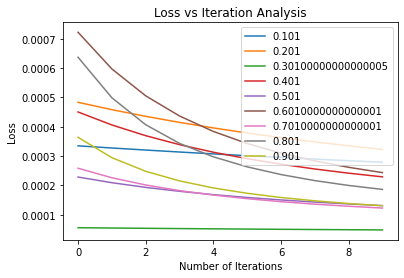

In [ ]:
from matplotlib import pyplot
for i in range(len(lr_range)):
    if i % 10:
       pyplot.plot(range(n_iter), results[i][2], label = str(lr_range[i]) ) 

      # naming the x axis , label = 'lr_range[i]'
       plt.xlabel('Number of Iterations') 
      # naming the y axis 
       plt.ylabel('Loss') 
      # giving a title to my graph 
       plt.title('Loss vs Iteration Analysis') 
pyplot.legend()
pyplot.show()